In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
data = pd.read_csv("C:/Users/HITESHWAR SINGH/Downloads/data.csv")

# Data Pre-processing


In [106]:
data.head()

,S_len,S_wid,P_len,P_wid,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
data.describe()

,S_len,S_wid,P_len,P_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S_len   150 non-null    float64
 1   S_wid   150 non-null    float64
 2   P_len   150 non-null    float64
 3   P_wid   150 non-null    float64
 4   Class   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [109]:
data.Class

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

In [110]:
data.isnull().sum()

S_len    0
S_wid    0
P_len    0
P_wid    0
Class    0
dtype: int64

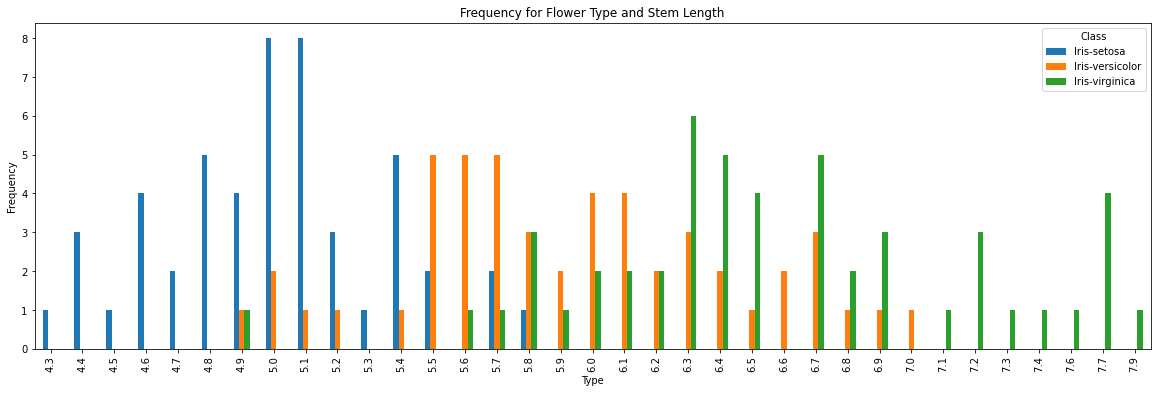

In [111]:
pd.crosstab(data.S_len,data.Class).plot(kind="bar",figsize=(20,6))
plt.title('Frequency for Flower Type and Stem Length')
plt.xlabel('Type')
plt.ylabel('Frequency')

plt.show()

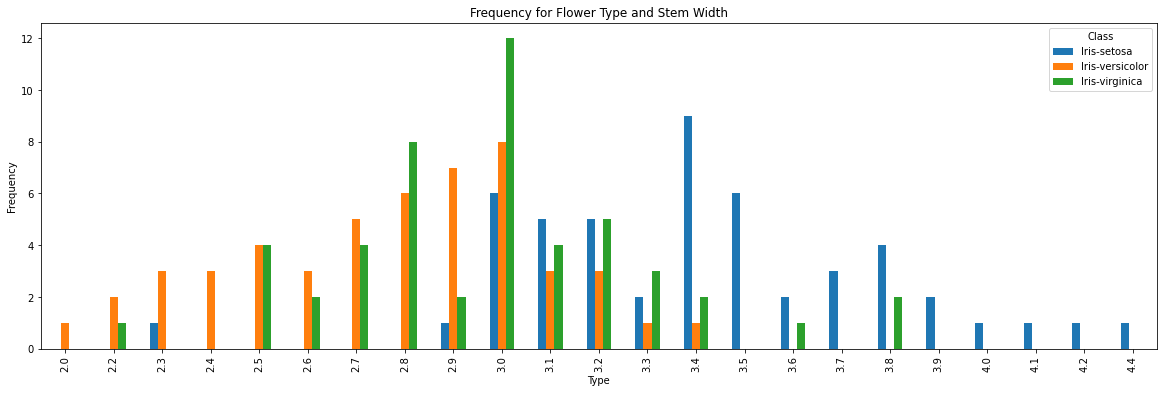

In [112]:
pd.crosstab(data.S_wid,data.Class).plot(kind="bar",figsize=(20,6))
plt.title('Frequency for Flower Type and Stem Width')
plt.xlabel('Type')
plt.ylabel('Frequency')

plt.show()

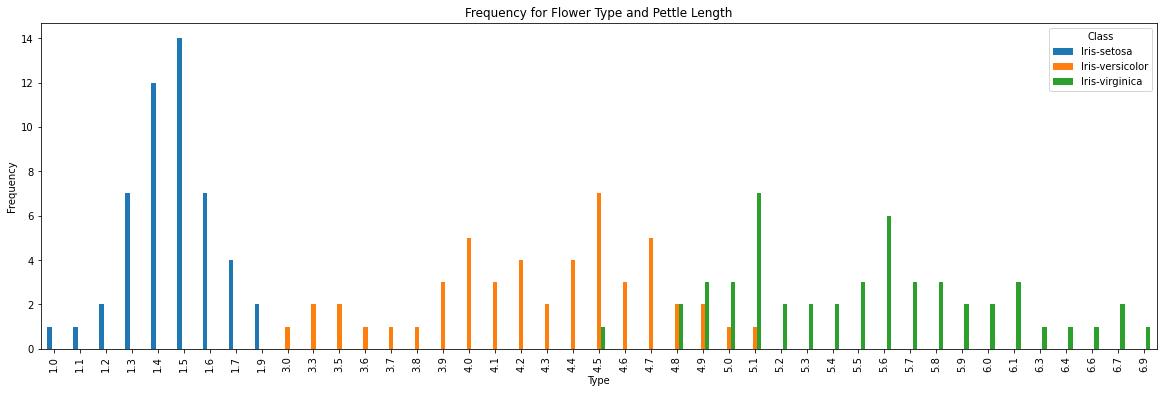

In [113]:
pd.crosstab(data.P_len,data.Class).plot(kind="bar",figsize=(20,6))
plt.title('Frequency for Flower Type and Pettle Length')
plt.xlabel('Type')
plt.ylabel('Frequency')

plt.show()

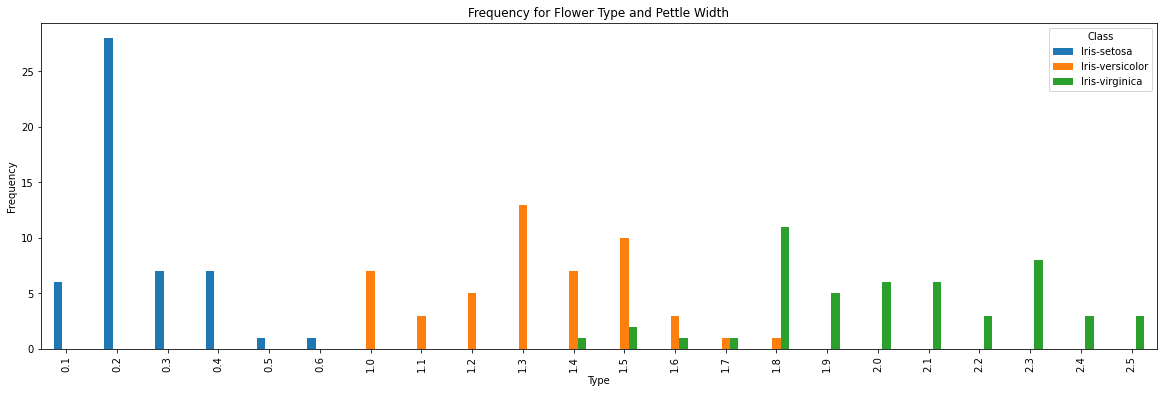

In [114]:
pd.crosstab(data.P_wid,data.Class).plot(kind="bar",figsize=(20,6))
plt.title('Frequency for Flower Type and Pettle Width')
plt.xlabel('Type')
plt.ylabel('Frequency')

plt.show()

## Encoding Class

In [115]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder() 
data["Class"] =lbl.fit_transform(list(data["Class"].values))


Text(0.5, 1.0, 'Features Correlating of Object data with Sale Price')

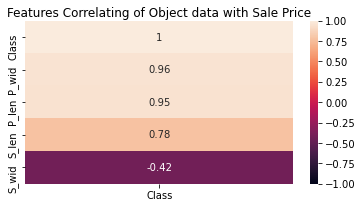

In [116]:
corr_cat = data.corr()[['Class']].sort_values(by='Class', ascending=False) # correlation of SalePrice with other features
plt.figure(figsize=(6,3))
heatmap = sns.heatmap(corr_cat, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating of Object data with Sale Price', fontdict={'fontsize':12}, pad=4)

In [117]:
X = data.drop("Class",axis=1)
Y = data["Class"]

In [118]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=42)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# Training Model

In [119]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

# Results and Evaulation

In [120]:
ypred = model.predict(xtest)
print("Accuracy:",model.score(xtest,ytest)*100,"%")
print("Precisioin:",precision_score(ytest,ypred,average="micro")*100,"%")
print("Recall:",recall_score(ytest,ypred,average="micro")*100,"%")
print("F1 Score:",f1_score(ytest,ypred,average="micro")*100,"%")


Accuracy: 97.77777777777777 %
Precisioin: 97.77777777777777 %
Recall: 97.77777777777777 %
F1 Score: 97.77777777777777 %


In [121]:
from sklearn.metrics import plot_confusion_matrix ,confusion_matrix, precision_score, recall_score, f1_score

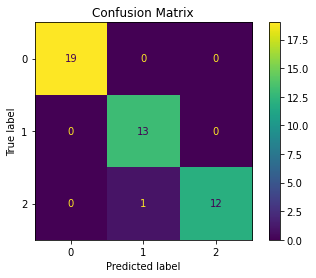

In [122]:

plot_confusion_matrix(model, xtest, ytest)
plt.title("Confusion Matrix")
plt.show()

In [123]:
from sklearn import metrics
print(metrics.classification_report(ytest, ypred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      0.929     1.000     0.963        13
           2      1.000     0.923     0.960        13

    accuracy                          0.978        45
   macro avg      0.976     0.974     0.974        45
weighted avg      0.979     0.978     0.978        45



In [124]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(model, X, Y, cv=3, n_jobs=-1,train_sizes=np.arange(1,100,10),scoring = 'neg_mean_squared_error')

In [125]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -valid_scores.mean(axis = 1)

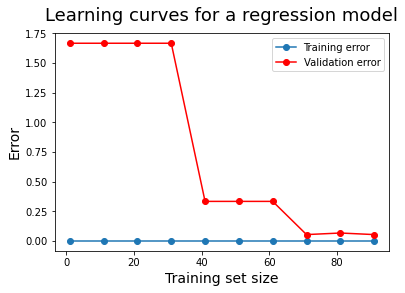

In [126]:
plt.plot(train_sizes, train_scores_mean,'o-', label = 'Training error')
plt.plot(train_sizes, validation_scores_mean,'o-', label = 'Validation error',color='r')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a regression model', fontsize = 18, y = 1.03)
plt.legend()